<a href="https://colab.research.google.com/github/bit-saurabh/CodeAlpha_Tasks/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iris Flower Species Classification using **Logistic Regression**
This script performs classification of iris species based on flower measurements.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [23]:
# Load the dataset
df = pd.read_csv('iris.csv')
print("=" * 60)
print("IRIS DATASET - EXPLORATORY DATA ANALYSIS")
print("=" * 60)
print(f"\nDataset Shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())
print(f"\nDataset Summary Statistics:")
print(df.describe())
print(f"\nSpecies Distribution:")
print(df['Species'].value_counts())

IRIS DATASET - EXPLORATORY DATA ANALYSIS

Dataset Shape: (150, 6)

First 5 rows:
   Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           1           5.1          3.5           1.4          0.2  setosa
1           2           4.9          3.0           1.4          0.2  setosa
2           3           4.7          3.2           1.3          0.2  setosa
3           4           4.6          3.1           1.5          0.2  setosa
4           5           5.0          3.6           1.4          0.2  setosa

Dataset Summary Statistics:
       Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count  150.000000    150.000000   150.000000    150.000000   150.000000
mean    75.500000      5.843333     3.057333      3.758000     1.199333
std     43.445368      0.828066     0.435866      1.765298     0.762238
min      1.000000      4.300000     2.000000      1.000000     0.100000
25%     38.250000      5.100000     2.800000      1.600000     0.300000
50

# **DATA VISUALIZATION**

## **Chart 1: Distribution of Numerical Variables**

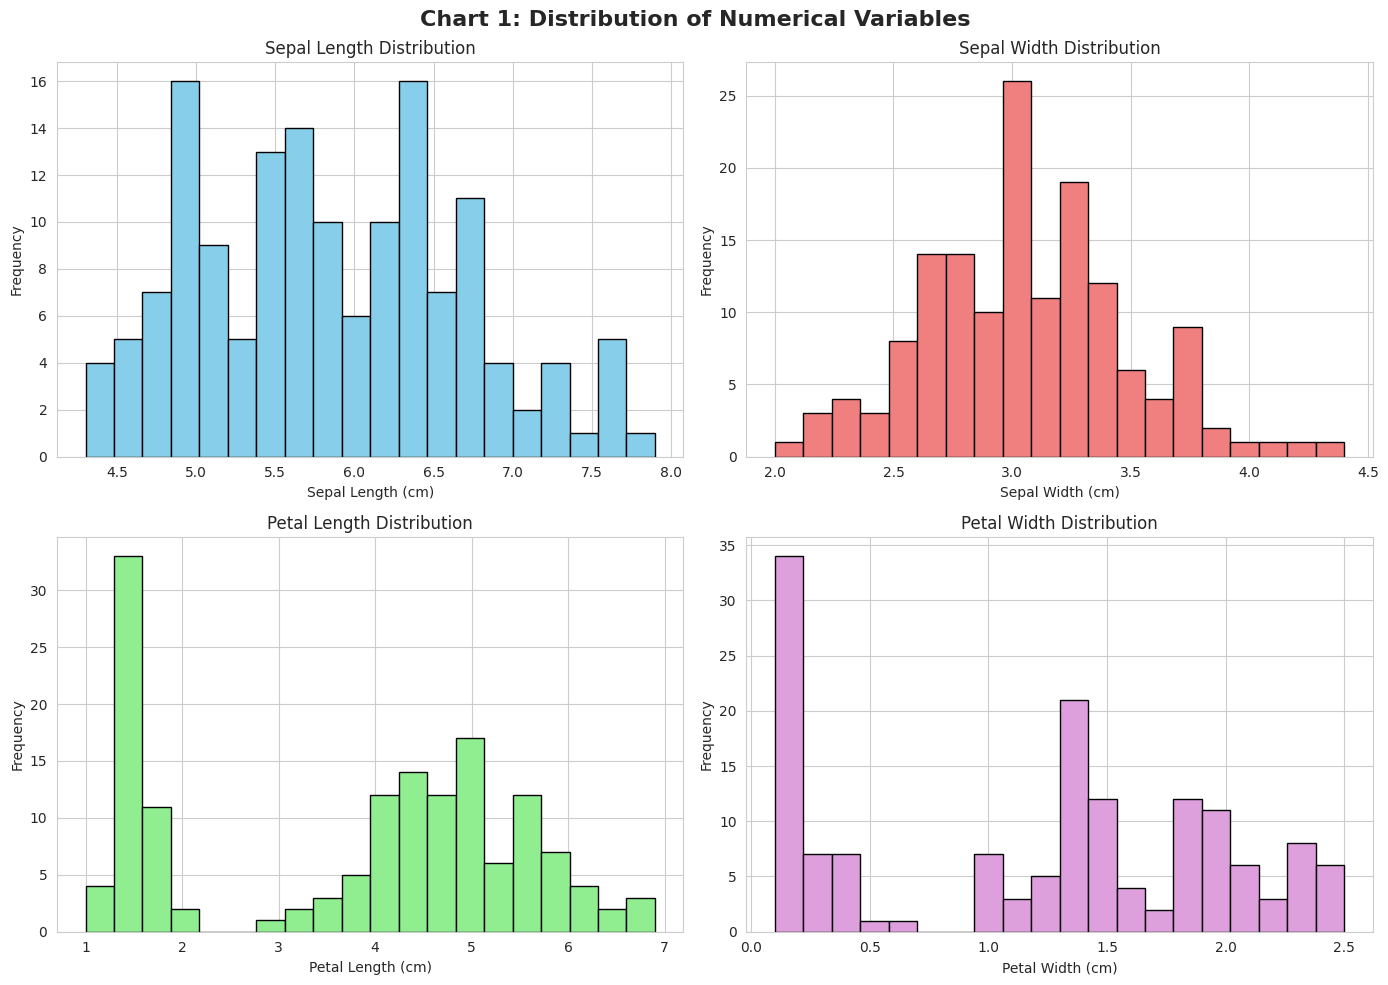

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Chart 1: Distribution of Numerical Variables', fontsize=16, fontweight='bold')

axes[0, 0].hist(df['Sepal.Length'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Sepal Length Distribution')
axes[0, 0].set_xlabel('Sepal Length (cm)')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(df['Sepal.Width'], bins=20, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Sepal Width Distribution')
axes[0, 1].set_xlabel('Sepal Width (cm)')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(df['Petal.Length'], bins=20, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Petal Length Distribution')
axes[1, 0].set_xlabel('Petal Length (cm)')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(df['Petal.Width'], bins=20, color='plum', edgecolor='black')
axes[1, 1].set_title('Petal Width Distribution')
axes[1, 1].set_xlabel('Petal Width (cm)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## **Chart 2: Sepal Length vs Sepal Width**

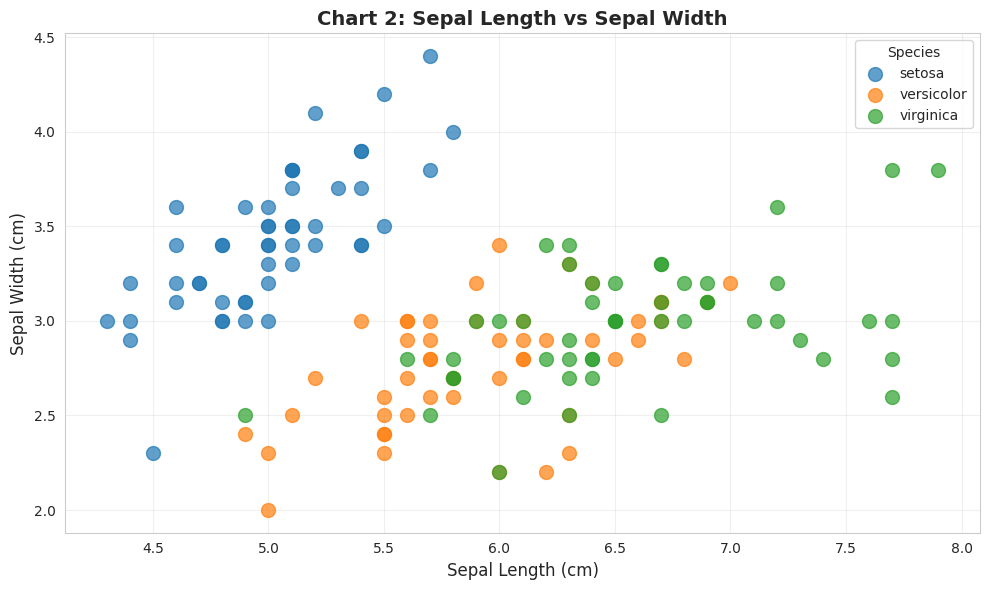

In [26]:
plt.figure(figsize=(10, 6))
for species in df['Species'].unique():
    species_data = df[df['Species'] == species]
    plt.scatter(species_data['Sepal.Length'], species_data['Sepal.Width'],
                label=species, alpha=0.7, s=100)
plt.title('Chart 2: Sepal Length vs Sepal Width', fontsize=14, fontweight='bold')
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Sepal Width (cm)', fontsize=12)
plt.legend(title='Species')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## **Chart 3: Petal Length vs Petal Width**

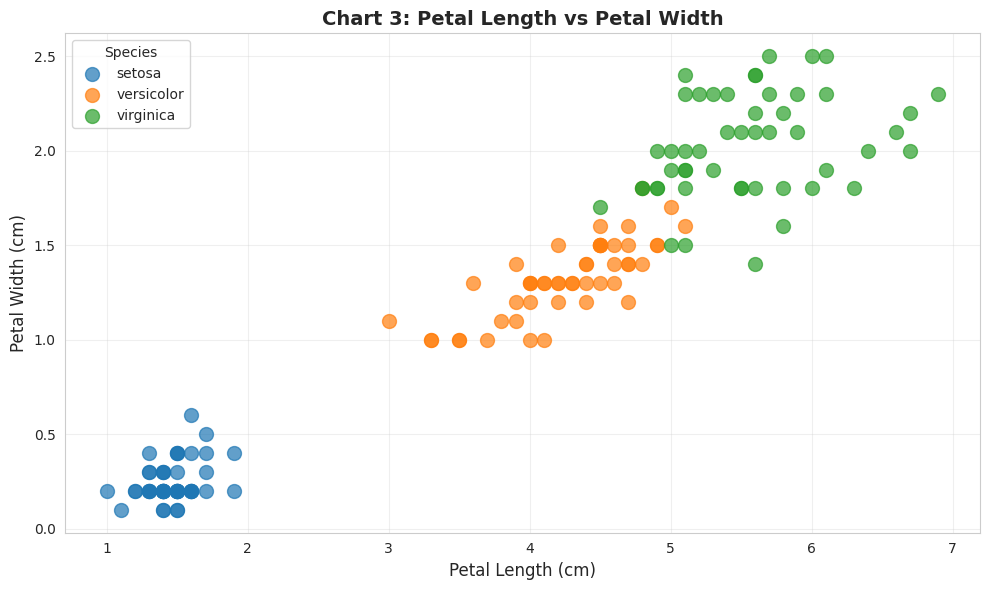

In [27]:
plt.figure(figsize=(10, 6))
for species in df['Species'].unique():
    species_data = df[df['Species'] == species]
    plt.scatter(species_data['Petal.Length'], species_data['Petal.Width'],
                label=species, alpha=0.7, s=100)
plt.title('Chart 3: Petal Length vs Petal Width', fontsize=14, fontweight='bold')
plt.xlabel('Petal Length (cm)', fontsize=12)
plt.ylabel('Petal Width (cm)', fontsize=12)
plt.legend(title='Species')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## ***Chart 4: Sepal Length vs Petal Length***

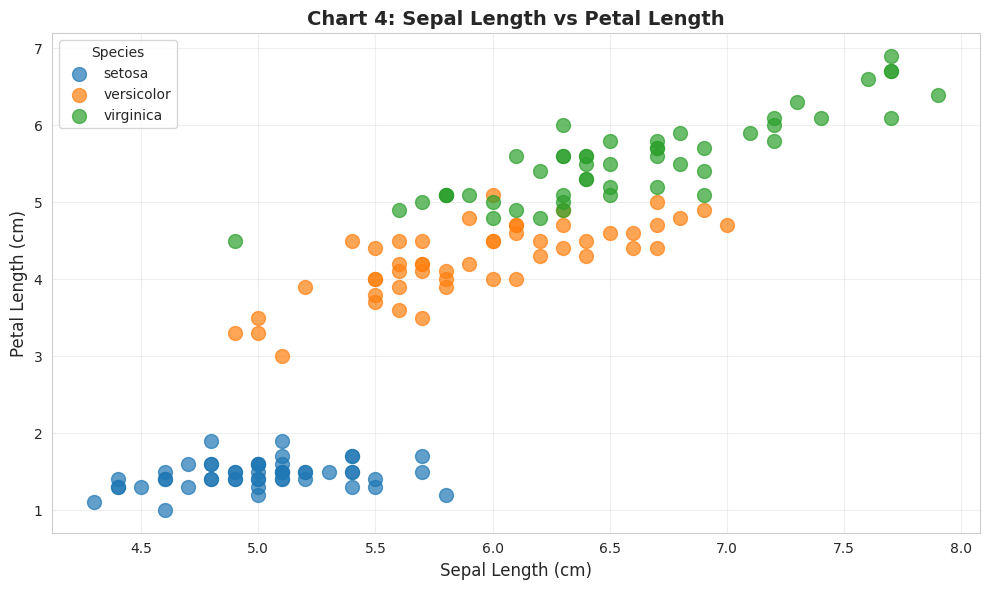

In [28]:
plt.figure(figsize=(10, 6))
for species in df['Species'].unique():
    species_data = df[df['Species'] == species]
    plt.scatter(species_data['Sepal.Length'], species_data['Petal.Length'],
                label=species, alpha=0.7, s=100)
plt.title('Chart 4: Sepal Length vs Petal Length', fontsize=14, fontweight='bold')
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Petal Length (cm)', fontsize=12)
plt.legend(title='Species')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## **Chart 5: Sepal Width vs Petal Width**

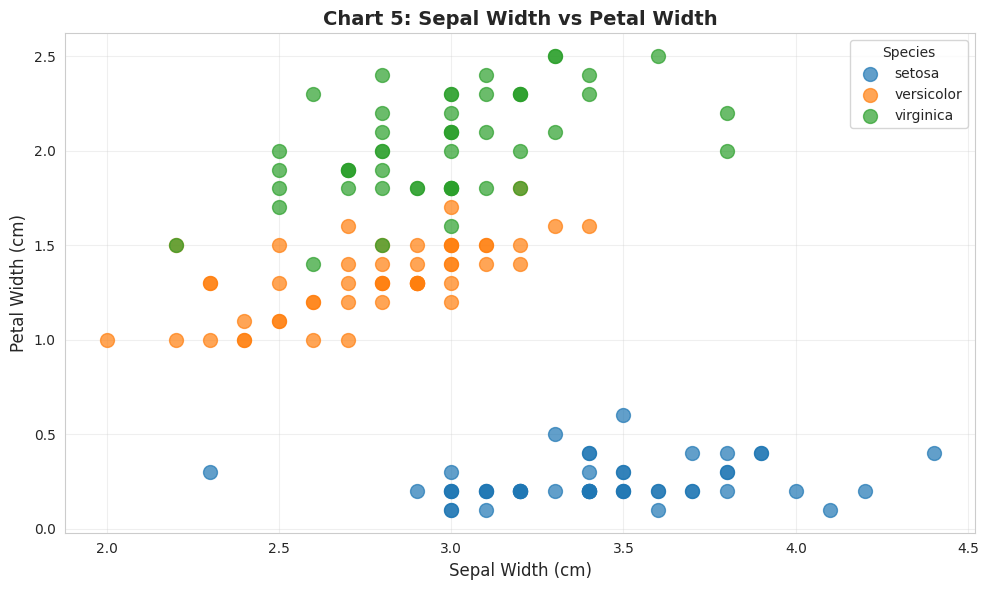

In [29]:
plt.figure(figsize=(10, 6))
for species in df['Species'].unique():
    species_data = df[df['Species'] == species]
    plt.scatter(species_data['Sepal.Width'], species_data['Petal.Width'],
                label=species, alpha=0.7, s=100)
plt.title('Chart 5: Sepal Width vs Petal Width', fontsize=14, fontweight='bold')
plt.xlabel('Sepal Width (cm)', fontsize=12)
plt.ylabel('Petal Width (cm)', fontsize=12)
plt.legend(title='Species')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## **Chart 6: Correlation Heatmap**

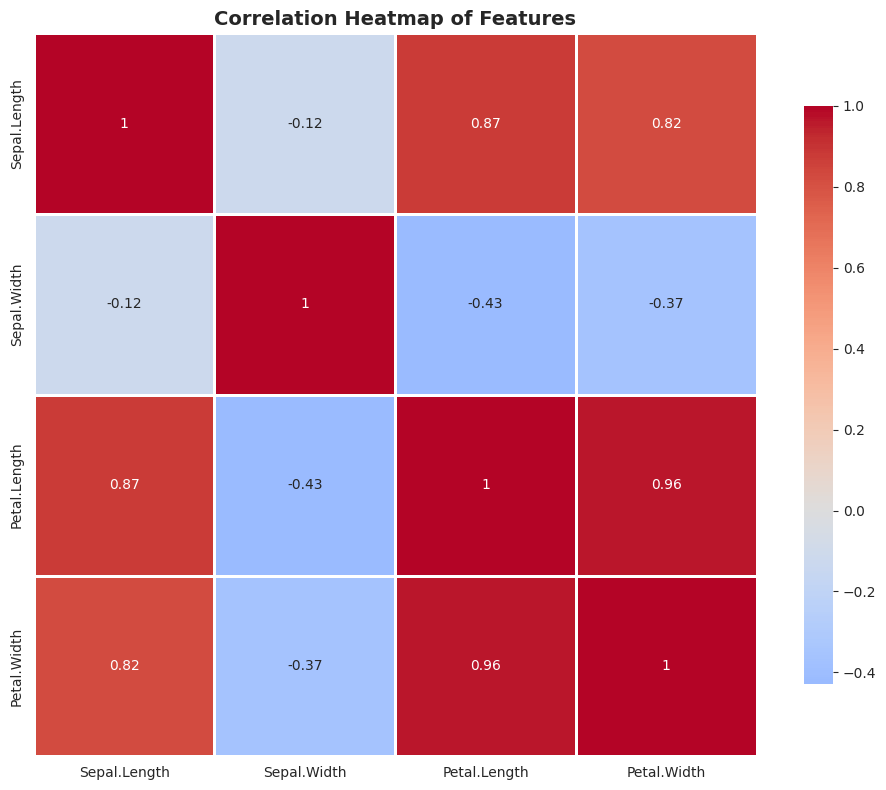

In [30]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# **MACHINE LEARNING MODEL**

In [31]:

print("\n" + "=" * 60)
print("MACHINE LEARNING MODEL TRAINING")
print("=" * 60)


MACHINE LEARNING MODEL TRAINING


In [9]:
X = df[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
y = df['Species']

In [10]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

In [12]:
model = LogisticRegression(max_iter=200, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [13]:
y_pred = model.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(
    y_test, y_pred, target_names=label_encoder.classes_
)

In [15]:
print("=" * 60)
print("IRIS SPECIES CLASSIFICATION - MODEL EVALUATION")
print("=" * 60)
print(f"\nModel: Logistic Regression")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"\nAccuracy Score: {accuracy:.4f}")
print(f"\nConfusion Matrix:")
print(conf_matrix)
print(f"\nClassification Report:")
print(class_report)
print("=" * 60)

IRIS SPECIES CLASSIFICATION - MODEL EVALUATION

Model: Logistic Regression
Training samples: 120
Testing samples: 30

Accuracy Score: 1.0000

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



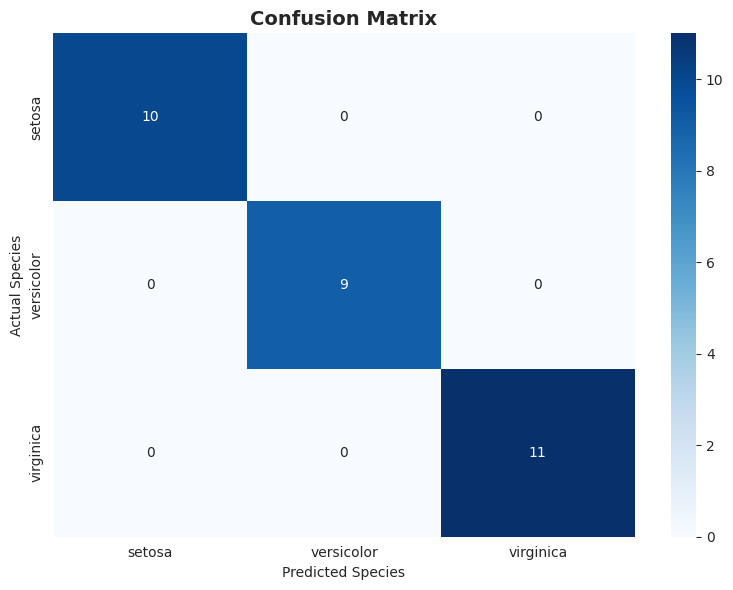

In [32]:
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.tight_layout()
plt.show()

In [33]:
def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    """
    Predict iris species based on flower measurements.

    Parameters:
    - sepal_length: Length of sepal in cm
    - sepal_width: Width of sepal in cm
    - petal_length: Length of petal in cm
    - petal_width: Width of petal in cm

    Returns: Predicted species name
    """
    input_data = [[sepal_length, sepal_width, petal_length, petal_width]]
    prediction = model.predict(input_data)
    species_name = label_encoder.inverse_transform(prediction)[0]
    return species_name


In [17]:
print("\n" + "=" * 60)
print("SAMPLE PREDICTIONS")
print("=" * 60)


SAMPLE PREDICTIONS


In [34]:
print("\n" + "=" * 60)
print("TEST YOUR OWN INPUT")
print("=" * 60)
print("\nEnter flower measurements to predict species:")

try:
    sepal_len = float(input("Sepal Length (cm): "))
    sepal_wid = float(input("Sepal Width (cm): "))
    petal_len = float(input("Petal Length (cm): "))
    petal_wid = float(input("Petal Width (cm): "))

    predicted_species = predict_species(sepal_len, sepal_wid, petal_len, petal_wid)
    print(f"\n✓ Predicted Species: {predicted_species.upper()}")
    print("=" * 60)
except ValueError:
    print("\nInvalid input. Please enter numerical values.")
except Exception as e:
    print(f"\nError: {e}")


TEST YOUR OWN INPUT

Enter flower measurements to predict species:
Sepal Length (cm): 6.1
Sepal Width (cm): 5.9
Petal Length (cm): 1.5
Petal Width (cm): 4.1

✓ Predicted Species: SETOSA


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
